In [26]:
import pandas as pd

In [4]:
import sys
print(sys.executable)


c:\Program Files\Python313\python.exe


In [7]:
import pandas as pd

In [8]:
DATA_PATH = r"C:\Users\nsri3\Downloads\archive\US_Accidents_March23.csv"
df_sample = pd.read_csv(DATA_PATH, nrows=100)
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     100 non-null    object 
 1   Source                 100 non-null    object 
 2   Severity               100 non-null    int64  
 3   Start_Time             100 non-null    object 
 4   End_Time               100 non-null    object 
 5   Start_Lat              100 non-null    float64
 6   Start_Lng              100 non-null    float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           100 non-null    float64
 10  Description            100 non-null    object 
 11  Street                 100 non-null    object 
 12  City                   100 non-null    object 
 13  County                 100 non-null    object 
 14  State                  100 non-null    object 
 15  Zipcode

In [10]:
# 1st Question:How many unique values are there in categorical columns like City, State, and Weather_Condition? 
# Which category is the most frequent in each?
City=df_sample["City"].unique()
State=df_sample["State"].unique()
Weather_Condition=df_sample["Weather_Condition"].unique()
print("UNIQES VALUES")
print("In city:",len(City))
print("In State:",len(State))
print("In Weather_Condition:",len(Weather_Condition))

UNIQES VALUES
In city: 31
In State: 1
In Weather_Condition: 9


In [17]:
# 2nd Question:Calculate the percentage of missing values in each column and list columns with more than 5% missing data.
col=df_sample.columns.tolist()
total_missing_values = df_sample.isna().sum()
missing_values_percent = (total_missing_values / len(df_sample)) * 100
print("Percentage of missing values per column:")
print(missing_values_percent)
cols_with_missing = missing_values_percent[missing_values_percent > 5]
print("\nColumns with more than 5% missing values:")
print(cols_with_missing)


Percentage of missing values per column:
ID                         0.0
Source                     0.0
Severity                   0.0
Start_Time                 0.0
End_Time                   0.0
Start_Lat                  0.0
Start_Lng                  0.0
End_Lat                  100.0
End_Lng                  100.0
Distance(mi)               0.0
Description                0.0
Street                     0.0
City                       0.0
County                     0.0
State                      0.0
Zipcode                    0.0
Country                    0.0
Timezone                   0.0
Airport_Code               0.0
Weather_Timestamp          0.0
Temperature(F)             0.0
Wind_Chill(F)             10.0
Humidity(%)                0.0
Pressure(in)               0.0
Visibility(mi)             0.0
Wind_Direction             0.0
Wind_Speed(mph)            6.0
Precipitation(in)         44.0
Weather_Condition          0.0
Amenity                    0.0
Bump                       0.

In [18]:
# 3rd Question:Convert Start_Time and End_Time columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.
df_sample["Start_Time"] = pd.to_datetime(df_sample["Start_Time"], errors="coerce")
df_sample["End_Time"]   = pd.to_datetime(df_sample["End_Time"], errors="coerce")
earliest_start = df_sample["Start_Time"].min()
latest_start   = df_sample["Start_Time"].max()
print("Earliest accident start time:", earliest_start)
print("Latest accident start time:", latest_start)


Earliest accident start time: 2016-02-08 05:46:00
Latest accident start time: 2016-02-11 08:13:24


In [20]:
# 4th Question:Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?
duplicates = df_sample[df_sample.duplicated()]
num_duplicates = df_sample.duplicated().sum()
print("Number of duplicate records:", num_duplicates)
df_cleaned = df_sample.drop_duplicates()


Number of duplicate records: 0


In [21]:
severity_counts = df_sample["Severity"].value_counts()
severity_percent = (severity_counts / len(df_sample)) * 100
print("Percentage of accidents by severity:")
print(severity_percent)

Percentage of accidents by severity:
Severity
2    61.0
3    39.0
Name: count, dtype: float64


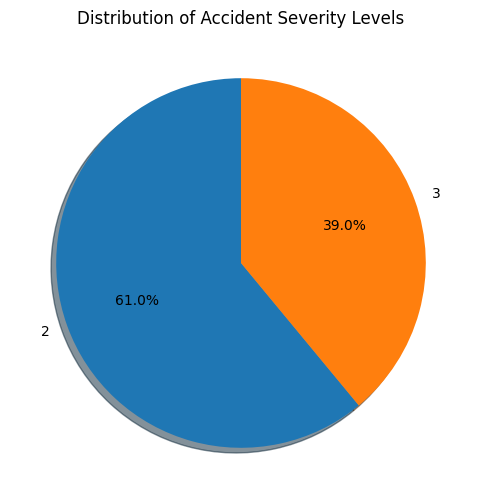

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(severity_percent, 
        labels=severity_percent.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=True)
plt.title("Distribution of Accident Severity Levels")
plt.show()